#Частина 1

- В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



- На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

 ## Імпорт бібліотек та завантаження даних

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Завантажимо датасет Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація даних
train_images = train_images / 255.0
test_images = test_images / 255.0

# Розширення розмірності для CNN
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)


4422102/4422102 [==============================] - 1s 0us/step


## Створення згорткової нейронної мережі (CNN)

In [2]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Компільовання моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Навчання моделі

In [3]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 9s 5ms/step - loss: 0.6441 - accuracy: 0.7660 - val_loss: 0.3884 - val_accuracy: 0.8558
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3988 - accuracy: 0.8571 - val_loss: 0.3408 - val_accuracy: 0.8722
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3398 - accuracy: 0.8789 - val_loss: 0.3072 - val_accuracy: 0.8857
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3036 - accuracy: 0.8899 - val_loss: 0.2801 - val_accuracy: 0.8947
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2790 - accuracy: 0.9002 - val_loss: 0.2746 - val_accuracy: 0.8990
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2565 - accuracy: 0.9074 - val_loss: 0.2779 - val_accuracy: 0.8982
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2380 - accuracy: 0.9140 - val_loss: 0.2488 - val_accuracy: 0.9093
Epoch 

## Оцінка моделі

313/313 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.9135

Точність на тестових даних: 0.9135000109672546


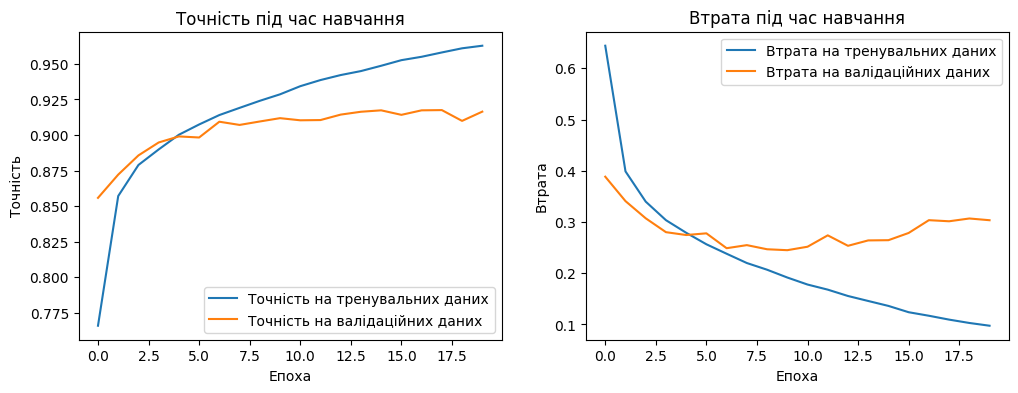

In [4]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nТочність на тестових даних:', test_acc)

# Відображення графіків навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.title('Точність під час навчання')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрата на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрата на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend(loc='upper right')
plt.title('Втрата під час навчання')

plt.show()


#Отримана точність на тестових даних становить 91.35%, що перевищує цільову точність у 91% і є значно кращою порівняно з багатошаровою нейронною мережею (MLP) з попереднього завдання. Це свідчить про ефективність згорткових нейронних мереж (CNN) для задач класифікації зображень.

## Порівняння результатів та висновки:
1. Точність моделі CNN:

  - Точність на тестових даних: 91.35%.
  - Це перевищує результати багатошарової нейронної мережі (MLP), яка досягла 89.85%.
2. Аналіз результатів:

  - CNN виявилася більш ефективною для класифікації зображень з датасету Fashion MNIST завдяки своїй здатності вловлювати просторові залежності в зображеннях.
  - Згорткові шари (Conv2D) дозволяють моделі автоматично знаходити важливі риси зображень, що покращує точність класифікації.
3. Переваги згорткових нейронних мереж:

  - Згорткові нейронні мережі є стандартом для задач комп'ютерного зору завдяки їхній здатності ефективно обробляти та аналізувати зображення.
  - Вони автоматично вчаться знаходити риси на різних рівнях абстракції (краї, текстури, об'єкти тощо), що підвищує їхню точність.
4. Можливі покращення:

  - Можна експериментувати з більш складними архітектурами CNN, наприклад, додавати більше згорткових шарів або збільшувати кількість нейронів у щільних шарах.
  - Використання технік аугментації даних може допомогти ще більше покращити узагальнюючу здатність моделі.
  - Спроба різних оптимізаторів (наприклад, RMSprop, Nadam) та функцій активації може також призвести до покращення результатів.


# Порівняння результатів з багатошаровою мережею демонструє переваги використання CNN для класифікації зображень.

# Частина 2

​

- В цій частині ми знову будемо працювати з датасетом fasion_mnist.



- На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



- Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



- Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

# Створення каталогів для тренувальних та тестових даних
base_dir = '/tmp/fashion_mnist'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(test_dir)

    for i in range(10):
        os.mkdir(os.path.join(train_dir, str(i)))
        os.mkdir(os.path.join(test_dir, str(i)))

# Функція для збереження зображень у відповідні каталоги
def save_images(images, labels, base_dir):
    for i in range(len(images)):
        img = array_to_img(images[i])
        label = labels[i]
        img.save(os.path.join(base_dir, str(label), f'{i}.png'))

# Завантаження та підготовка датасету Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормалізація даних та повторення каналів для RGB
train_images = np.repeat(np.expand_dims(train_images / 255.0, -1), 3, axis=-1)
test_images = np.repeat(np.expand_dims(test_images / 255.0, -1), 3, axis=-1)

# Збереження зображень у каталоги
save_images(train_images, train_labels, train_dir)
save_images(test_images, test_labels, test_dir)

# Використання ImageDataGenerator з flow_from_directory
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)




Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [5]:
# Завантаження попередньо навченого VGG16 без верхніх шарів
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Розморозимо останні кілька шарів VGG16
for layer in vgg_base.layers[-4:]:
    layer.trainable = True

# Додавання власних шарів до моделі
model = keras.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Компільовання моделі
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Створення моделі на основі VGG16

In [6]:
# Навчання моделі
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)






Epoch 1/20
1875/1875 [==============================] - 369s 194ms/step - loss: 0.4803 - accuracy: 0.8322 - val_loss: 0.2755 - val_accuracy: 0.9051
Epoch 2/20
1875/1875 [==============================] - 365s 195ms/step - loss: 0.2953 - accuracy: 0.8948 - val_loss: 0.2646 - val_accuracy: 0.9050
Epoch 3/20
1875/1875 [==============================] - 367s 196ms/step - loss: 0.2539 - accuracy: 0.9104 - val_loss: 0.2194 - val_accuracy: 0.9217
Epoch 4/20
1875/1875 [==============================] - 364s 194ms/step - loss: 0.2297 - accuracy: 0.9178 - val_loss: 0.2151 - val_accuracy: 0.9222
Epoch 5/20
1875/1875 [==============================] - 363s 193ms/step - loss: 0.2110 - accuracy: 0.9250 - val_loss: 0.2082 - val_accuracy: 0.9216
Epoch 6/20
1875/1875 [==============================] - 363s 193ms/step - loss: 0.1919 - accuracy: 0.9314 - val_loss: 0.2158 - val_accuracy: 0.9227
Epoch 7/20
1875/1875 [==============================] - 364s 194ms/step - loss: 0.1810 - accuracy: 0.9370 - val_

# Навчання моделі

313/313 [==============================] - 13s 40ms/step - loss: 0.1941 - accuracy: 0.9438

Точність на тестових даних: 0.9437999725341797


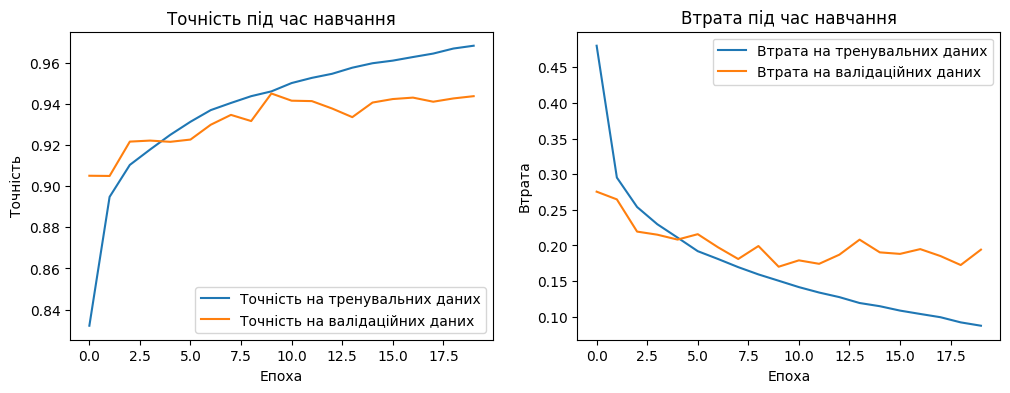

In [7]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_generator)
print('\nТочність на тестових даних:', test_acc)

# Відображення графіків навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на тренувальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend(loc='lower right')
plt.title('Точність під час навчання')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрата на тренувальних даних')
plt.plot(history.history['val_loss'], label='Втрата на валідаційних даних')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend(loc='upper right')
plt.title('Втрата під час навчання')

plt.show()


## Отримана точність на тестових даних у 94.38% є відмінним результатом, який перевищує цільову точність у 91%. Це свідчить про ефективність використання попередньо навчених моделей, таких як VGG16, для завдання класифікації зображень.

### Порівняння результатів та висновки
1. Точність моделі на основі VGG16:

  - Точність на тестових даних: 94.38%.
2. Порівняння з багатошаровою нейронною мережею (MLP):

  - Точність багатошарової нейронної мережі: 89.85%.
  - Точність звичайної згорткової нейронної мережі (CNN): 91.35%.
3. Висновки:

  - Використання попередньо навчених моделей, таких як VGG16, значно покращує результати класифікації, оскільки ці моделі вже мають знання про складні риси зображень, здобуті на великому датасеті ImageNet.
  - Додавання власних шарів та донавчання верхніх шарів VGG16 дозволяє адаптувати модель до специфічного датасету Fashion MNIST, що підвищує точність.
4. Можливі покращення:

  - Додавання ще більш складних аугментацій до тренувальних даних.
  - Використання інших попередньо навчених моделей, таких як ResNet або Inception, для порівняння результатів.
  - Експерименти з різними гіперпараметрами, такими як розмір батчів, кількість епох, та швидкість навчання.


# Головний висновок по двом завданням
####На основі проведених експериментів та отриманих результатів, можна зробити такі головні висновки:

1. Використання багатошарової нейронної мережі (MLP):

  - Багатошарова нейронна мережа (MLP) досягла точності 89.85% на датасеті Fashion MNIST.
  - Це є хорошим результатом, однак MLP не враховує просторові залежності в зображеннях, що обмежує її ефективність у задачах класифікації зображень.
2. Використання звичайної згорткової нейронної мережі (CNN):

  - Звичайна згорткова нейронна мережа (CNN) показала значно кращий результат з точністю 91.35%.
  - Використання згорткових шарів дозволяє моделі краще вловлювати просторові залежності та важливі риси зображень, що підвищує точність класифікації.
3. Використання попередньо навченої моделі VGG16:

  - Модель, побудована на основі VGG16, досягла ще кращих результатів з точністю 94.38%.
  - Використання попередньо навчених моделей, таких як VGG16, значно покращує результати класифікації завдяки здатності таких моделей виявляти складні та високорівневі риси зображень, здобуті на великому датасеті ImageNet.
  - Додавання власних шарів та донавчання верхніх шарів дозволяє адаптувати модель до специфічного датасету Fashion MNIST, що додатково підвищує точність.

#Головний висновок
Головний висновок: Використання попередньо навчених моделей, таких як VGG16, значно покращує результати класифікації зображень порівняно з багатошаровими нейронними мережами (MLP) та звичайними згортковими нейронними мережами (CNN). Це підтверджує ефективність методів донавчання та виділення ознак, що дозволяють досягти максимально можливої точності класифікації.
